## Eksploratory Data Analys dan Model Prediksi F1

In [ ]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

% matplotlib inline

In [ ]:
# Import Dataset
df = pd.read_csv('drivers.csv', parse_dates=['driver_dob'])
pd.get_option("display.max_columns",None)
df

,driverRef,driver_number,driver_code,driver_forename,driver_surname,driver_dob,driver_nationality,driver_url,resultId,raceId,...,final_position,positionText,positionOrder,points,time,fastestLap,rank,fastestLapTime,fastestLapSpeed,status
0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,...,1,1,1,10.0,34:50.6,39,2,01:27.5,218.3,Finished
1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,19,...,5,5,5,4.0,46.548,53,3,01:35.5,209.033,Finished
2,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,57,20,...,13,13,13,0.0,\N,25,19,01:35.5,203.969,+1 Lap
3,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,21,...,3,3,3,6.0,4.187,20,3,01:22.0,204.323,Finished
4,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,90,22,...,2,2,2,8.0,3.779,31,2,01:26.5,222.085,Finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25532,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25456,1076,...,11,11,11,0.0,+1:21.695,55,11,01:22.5,230.198,Finished
25533,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25480,1077,...,15,15,15,0.0,\N,61,11,01:21.3,217.41,+1 Lap
25534,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25505,1078,...,\N,R,20,0.0,\N,4,20,01:35.7,203.52,Water leak
25535,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25524,1079,...,\N,R,19,0.0,\N,12,20,01:28.4,190.352,Power loss


#### A. Cleaning Data

Data cleansing atau yang disebut juga dengan data scrubbing merupakan suatu proses analisa mengenai kualitas dari data dengan mengubah. Bisa juga pengelola mengoreksi ataupun menghapus data tersebut. Data yang dibersihkan tersebut adalah data yang salah, rusak, tidak akurat, tidak lengkap dan salah format.

Tahapan pembersihan data pada analisis ini : 

1. Menggabungkan kolom yang tidak penting
2. Ekstrak dataset pada kolom date
3. Rename kolom
4. Replace \N dengan nilai 0
5. Isi nilai yang kosong
5. Drop kolom
6. Rename tipe data yang sesuai

##### 1. Menggabungkan kolom yang tidak penting

 pada dataset ini ada beberapa kolom yang perlu digabungkan yaitu terdapat pada kolom "driver_forename" dan kolom "driver_surname". kolom tersebut merupakan string untuk nama depan dan nama belakang para pembalap. oleh sebab itu kami menggabungkan menjadi "driver_name".

In [ ]:
# Menggabungkan kolom (driver_forname, driver_surname) menjadi driver_name

df['driver_name'] = df['driver_forename']+' '+df['driver_surname']

In [ ]:
df

,driverRef,driver_number,driver_code,driver_forename,driver_surname,driver_dob,driver_nationality,driver_url,resultId,raceId,...,positionText,positionOrder,points,time,fastestLap,rank,fastestLapTime,fastestLapSpeed,status,driver_name
0,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,...,1,1,10.0,34:50.6,39,2,01:27.5,218.3,Finished,Lewis Hamilton
1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,19,...,5,5,4.0,46.548,53,3,01:35.5,209.033,Finished,Lewis Hamilton
2,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,57,20,...,13,13,0.0,\N,25,19,01:35.5,203.969,+1 Lap,Lewis Hamilton
3,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,21,...,3,3,6.0,4.187,20,3,01:22.0,204.323,Finished,Lewis Hamilton
4,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,90,22,...,2,2,8.0,3.779,31,2,01:26.5,222.085,Finished,Lewis Hamilton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25532,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25456,1076,...,11,11,0.0,+1:21.695,55,11,01:22.5,230.198,Finished,Guanyu Zhou
25533,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25480,1077,...,15,15,0.0,\N,61,11,01:21.3,217.41,+1 Lap,Guanyu Zhou
25534,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25505,1078,...,R,20,0.0,\N,4,20,01:35.7,203.52,Water leak,Guanyu Zhou
25535,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25524,1079,...,R,19,0.0,\N,12,20,01:28.4,190.352,Power loss,Guanyu Zhou


##### 2. Ekstrak Dataset pada kolom Date

untuk mempermudah analisa kedepannya. kami mengekstrak kolom "driver_dob" dan dibagi menjadi beberapa kolom baru, yaitu : year, month, date. tujuan ekstrak data ini untuk memisahkan tahun, bulan dan hari.



In [ ]:
# Ekstrak kolom (driver_dob)
driver_dt = df.driver_dob.dt

In [ ]:
# Ekstrak kolom terdiri dari kolom (year, month, day)
df['year'] = driver_dt.year
df['month'] = driver_dt.month
df['day'] = driver_dt.day
df.drop(columns='driver_dob', inplace=True)
df.head()

,driverRef,driver_number,driver_code,driver_forename,driver_surname,driver_nationality,driver_url,resultId,raceId,result_number,...,time,fastestLap,rank,fastestLapTime,fastestLapSpeed,status,driver_name,year,month,day
0,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,22,...,34:50.6,39,2,01:27.5,218.3,Finished,Lewis Hamilton,1985,1,7
1,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,19,22,...,46.548,53,3,01:35.5,209.033,Finished,Lewis Hamilton,1985,1,7
2,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,57,20,22,...,\N,25,19,01:35.5,203.969,+1 Lap,Lewis Hamilton,1985,1,7
3,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,21,22,...,4.187,20,3,01:22.0,204.323,Finished,Lewis Hamilton,1985,1,7
4,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,90,22,22,...,3.779,31,2,01:26.5,222.085,Finished,Lewis Hamilton,1985,1,7


##### 3. Rename Kolom

Rename kolom/mengganti nama kolom bertujuan untuk mempermudah analisis. seperti pada kasus ini kolom "rank" pada pemrograman python di definisikan menjadi sebuah fungsi. oleh sebab itu kami mengganti nama kolom "rank" menjadi "ranking".

In [ ]:
# Rename kolom (rank)
df.rename(columns = {'rank':'ranking'}, inplace=True)

##### 4. Replace \N dengan nilai 0

Pada kolom tertentu terdapat nilai (\n) mungkin maksud nilai tersebut adalah 0. oleh sebab itu kami mengganti nilai (\n) dengan nilai (0). 

In [ ]:
# Replace nilai(\N ) pada kolom tertentu menjadi nilai (0)
df.final_position.replace('\\N', np.nan, inplace=True)
df.time.replace('\\N', np.nan, inplace=True)
df.fastestLap.replace('\\N', np.nan, inplace=True)
df.ranking.replace('\\N', np.nan, inplace=True)
df.fastestLapTime.replace('\\N', np.nan, inplace=True)

In [ ]:
df

,driverRef,driver_number,driver_code,driver_forename,driver_surname,driver_nationality,driver_url,resultId,raceId,result_number,...,time,fastestLap,ranking,fastestLapTime,fastestLapSpeed,status,driver_name,year,month,day
0,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,22,...,34:50.6,39,2,01:27.5,218.3,Finished,Lewis Hamilton,1985,1,7
1,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,19,22,...,46.548,53,3,01:35.5,209.033,Finished,Lewis Hamilton,1985,1,7
2,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,57,20,22,...,NaN,25,19,01:35.5,203.969,+1 Lap,Lewis Hamilton,1985,1,7
3,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,21,22,...,4.187,20,3,01:22.0,204.323,Finished,Lewis Hamilton,1985,1,7
4,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,90,22,22,...,3.779,31,2,01:26.5,222.085,Finished,Lewis Hamilton,1985,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25532,zhou,24,ZHO,Guanyu,Zhou,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25456,1076,24,...,+1:21.695,55,11,01:22.5,230.198,Finished,Guanyu Zhou,1999,5,30
25533,zhou,24,ZHO,Guanyu,Zhou,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25480,1077,24,...,NaN,61,11,01:21.3,217.41,+1 Lap,Guanyu Zhou,1999,5,30
25534,zhou,24,ZHO,Guanyu,Zhou,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25505,1078,24,...,NaN,4,20,01:35.7,203.52,Water leak,Guanyu Zhou,1999,5,30
25535,zhou,24,ZHO,Guanyu,Zhou,Chinese,http://en.wikipedia.org/wiki/Guanyu_Zhou,25524,1079,24,...,NaN,12,20,01:28.4,190.352,Power loss,Guanyu Zhou,1999,5,30


In [ ]:
# Cek kolom yang kosong
df.isnull().sum() / len(df) * 100

driverRef              0.000000
driver_number          0.000000
driver_code            0.000000
driver_forename        0.000000
driver_surname         0.000000
driver_nationality     0.000000
driver_url             0.000000
resultId               0.000000
raceId                 0.000000
result_number          0.000000
start_position         0.000000
final_position        42.307240
positionText           0.000000
positionOrder          0.000000
points                 0.000000
time                  72.996045
fastestLap            72.240279
ranking               71.449270
fastestLapTime        72.240279
fastestLapSpeed        0.000000
status                 0.000000
driver_name            0.000000
year                   0.000000
month                  0.000000
day                    0.000000
dtype: float64

##### 5. Isi nilai yang kosong

didalam kolom tertentu masih ada beberapa nilai yang kosong. oleh sebab itu kami mengganti nilai yang kosong tersebut dengan nilai (0) dengan memanfaatkan fungsi Fiilna(). 

In [ ]:
# Isi nilai yang kosong
df[['ranking','fastestLap','final_position','time', 'positionText', 'fastestLapTime', 'fastestLapSpeed']] = df[['ranking','fastestLap','final_position','time', 'positionText', 'fastestLapTime', 'fastestLapSpeed']].fillna(0)

In [ ]:
df.head()

,driverRef,driver_number,driver_code,driver_forename,driver_surname,driver_nationality,driver_url,resultId,raceId,result_number,...,time,fastestLap,ranking,fastestLapTime,fastestLapSpeed,status,driver_name,year,month,day
0,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,18,22,...,34:50.6,39,2,01:27.5,218.3,Finished,Lewis Hamilton,1985,1,7
1,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,27,19,22,...,46.548,53,3,01:35.5,209.033,Finished,Lewis Hamilton,1985,1,7
2,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,57,20,22,...,0,25,19,01:35.5,203.969,+1 Lap,Lewis Hamilton,1985,1,7
3,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,69,21,22,...,4.187,20,3,01:22.0,204.323,Finished,Lewis Hamilton,1985,1,7
4,hamilton,44,HAM,Lewis,Hamilton,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,90,22,22,...,3.779,31,2,01:26.5,222.085,Finished,Lewis Hamilton,1985,1,7


##### 6. Hapus/Drop kolom

sebentar lagi kami akan melakukan proses Visualisasi dan Model prediksi. oleh sebab itu kami menghapus kolom yang sekiranya tidak terpakai

In [ ]:
# Hapus kolom yang tidak terpakai
df.drop(['driverRef', 'driver_number', 'driver_code','driver_forename', 'driver_surname','driver_url'], axis=1, inplace=True)

In [ ]:
df.head()

,driver_nationality,resultId,raceId,result_number,start_position,final_position,positionText,positionOrder,points,time,fastestLap,ranking,fastestLapTime,fastestLapSpeed,status,driver_name,year,month,day
0,British,1,18,22,1,1,1,1,10.0,34:50.6,39,2,01:27.5,218.3,Finished,Lewis Hamilton,1985,1,7
1,British,27,19,22,9,5,5,5,4.0,46.548,53,3,01:35.5,209.033,Finished,Lewis Hamilton,1985,1,7
2,British,57,20,22,3,13,13,13,0.0,0,25,19,01:35.5,203.969,+1 Lap,Lewis Hamilton,1985,1,7
3,British,69,21,22,5,3,3,3,6.0,4.187,20,3,01:22.0,204.323,Finished,Lewis Hamilton,1985,1,7
4,British,90,22,22,3,2,2,2,8.0,3.779,31,2,01:26.5,222.085,Finished,Lewis Hamilton,1985,1,7


In [ ]:
# melihat tipe data
df.dtypes

driver_nationality     object
resultId                int64
raceId                  int64
result_number           int64
start_position          int64
final_position         object
positionText           object
positionOrder           int64
points                float64
time                   object
fastestLap             object
ranking                object
fastestLapTime         object
fastestLapSpeed        object
status                 object
driver_name            object
year                    int64
month                   int64
day                     int64
dtype: object

##### 7. Rename Tipe Data yang Sesuai

karena masih ada tipe data yang tidak sesuai. kami mengganti tipe data tersebut. seperti contoh yang seharusnya pada kolom (final_position) tipe data integer/float maka terdeteksi tipe data objek. oleh sebab itu kami mengganti tipe data tersebut dengan tipe aslinya.

In [ ]:
# Mengembalikan tipe data aslinya data object menjadi data float/integer

l = ['final_position','positionText','fastestLap','ranking','fastestLapSpeed']
for i in l:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [ ]:
df.head()

,driver_nationality,resultId,raceId,result_number,start_position,final_position,positionText,positionOrder,points,time,fastestLap,ranking,fastestLapTime,fastestLapSpeed,status,driver_name,year,month,day
0,British,1,18,22,1,1,1.0,1,10.0,34:50.6,39,2,01:27.5,218.300,Finished,Lewis Hamilton,1985,1,7
1,British,27,19,22,9,5,5.0,5,4.0,46.548,53,3,01:35.5,209.033,Finished,Lewis Hamilton,1985,1,7
2,British,57,20,22,3,13,13.0,13,0.0,0,25,19,01:35.5,203.969,+1 Lap,Lewis Hamilton,1985,1,7
3,British,69,21,22,5,3,3.0,3,6.0,4.187,20,3,01:22.0,204.323,Finished,Lewis Hamilton,1985,1,7
4,British,90,22,22,3,2,2.0,2,8.0,3.779,31,2,01:26.5,222.085,Finished,Lewis Hamilton,1985,1,7


### B. Representasi Data

Tahap representasi data, kami memakai analisis visualisasi dan model prediksi.

##### 1. Visualiasi Pemenang GP F1 berdasarkan position order

Dari grafik ini kami akan menampilkan pemenang juara 1 F1 dari tahun 1985 - 2000



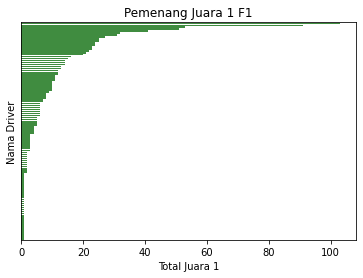

In [ ]:
# Visualiasi juara 1 F1 berdasarkan position order
from pandas.core.groupby import groupby
driver_winner = df.loc[df['positionOrder']==1].groupby('driver_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
sb.barplot(data=driver_winner, y='driver_name', x='positionOrder', color='green', alpha=0.8)
plt.title('Pemenang Juara 1 F1')
plt.ylabel('Nama Driver')
plt.xlabel('Total Juara 1')
plt.yticks([]);

In [ ]:
# menampilkan 10 juara 1 dari tahun 1985 - 2000
top10Drivers_win = driver_winner.head(10)
print(top10Drivers_win)

          driver_name  positionOrder
0      Lewis Hamilton            103
1  Michael Schumacher             91
2    Sebastian Vettel             53
3         Alain Prost             51
4        Ayrton Senna             41
5     Fernando Alonso             32
6       Nigel Mansell             31
7      Jackie Stewart             27
8           Jim Clark             25
9          Niki Lauda             25


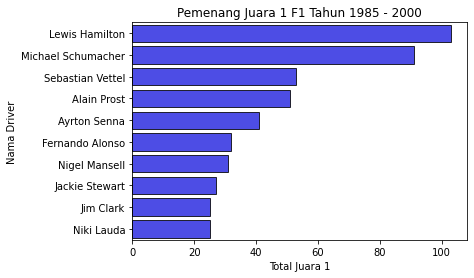

In [ ]:
# # menampilkan 10 juara 1 dari tahun 1985 - 2000 dalam bentuk grafik plot
sb.barplot(data = top10Drivers_win, y='driver_name', x='positionOrder', color='blue', alpha=0.8, edgecolor='black')
plt.title('Pemenang Juara 1 F1 Tahun 1985 - 2000')
plt.ylabel('Nama Driver')
plt.xlabel('Total Juara 1');

##### 2. Visualisasi Pemenang F1 berdasarkan jumlah point

Dari grafik ini akan menampilkan pemenang F1 berdasarkan jumlah point terbanyak pada tahun 1985 - 2000

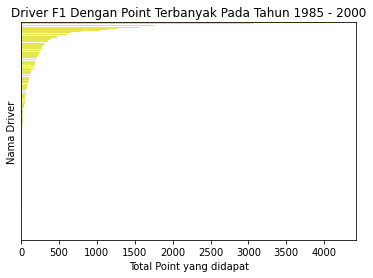

In [ ]:
# Visualiasi juara 1 F1 berdasarkan jumlah point terbanyak
from pandas.core.groupby import groupby
driver_champions = df.loc[df['points']>1].groupby('driver_name')['points'].sum().sort_values(ascending=False).to_frame().reset_index()
sb.barplot(data=driver_champions, y='driver_name', x='points', color='yellow', alpha=0.8)
plt.title('Driver F1 Dengan Point Terbanyak Pada Tahun 1985 - 2000')
plt.ylabel('Nama Driver')
plt.xlabel('Total Point yang didapat')
plt.yticks([]);

In [ ]:
# menampilkan 10 pemenang berdasarkan jumlah point terbanyak dari tahun 1985 - 2000
top10Drivers_champions = driver_champions.head(10)
print(top10Drivers_champions)

          driver_name  points
0      Lewis Hamilton  4210.5
1    Sebastian Vettel  3055.0
2     Fernando Alonso  1980.0
3      Kimi Räikkönen  1859.0
4     Valtteri Bottas  1766.0
5      Max Verstappen  1664.5
6        Nico Rosberg  1585.0
7  Michael Schumacher  1555.0
8    Daniel Ricciardo  1271.0
9       Jenson Button  1217.0


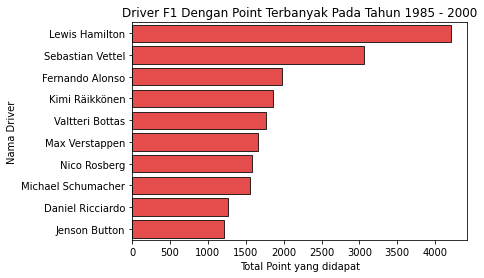

In [ ]:
# menampilkan 10 pemenang berdasarkan jumlah point terbanyak dari tahun 1985 - 2000
sb.barplot(data = top10Drivers_champions, y='driver_name', x='points', color='red', alpha=0.8, edgecolor='black')
plt.title('Driver F1 Dengan Point Terbanyak Pada Tahun 1985 - 2000')
plt.ylabel('Nama Driver')
plt.xlabel('Total Point yang didapat');

In [ ]:
df.head()

,driver_nationality,resultId,raceId,result_number,start_position,final_position,positionText,positionOrder,points,time,fastestLap,ranking,fastestLapTime,fastestLapSpeed,status,driver_name,year,month,day
0,British,1,18,22,1,1,1.0,1,10.0,34:50.6,39,2,01:27.5,218.300,Finished,Lewis Hamilton,1985,1,7
1,British,27,19,22,9,5,5.0,5,4.0,46.548,53,3,01:35.5,209.033,Finished,Lewis Hamilton,1985,1,7
2,British,57,20,22,3,13,13.0,13,0.0,0,25,19,01:35.5,203.969,+1 Lap,Lewis Hamilton,1985,1,7
3,British,69,21,22,5,3,3.0,3,6.0,4.187,20,3,01:22.0,204.323,Finished,Lewis Hamilton,1985,1,7
4,British,90,22,22,3,2,2.0,2,8.0,3.779,31,2,01:26.5,222.085,Finished,Lewis Hamilton,1985,1,7


##### 2. Model Prediksi

Dalam merepresentasikan data kami membuat model prediksi dimana data target nya adalah (status) dan sisanya adalah fitur.

Untuk membangun model prediksi kami mencoba menghapus kolom yang menurut kami itu tidak penting.

In [ ]:
# Drop kolom
df.drop(['driver_nationality','resultId','raceId','result_number','time','driver_name','year','month','day','fastestLapTime'], axis=1, inplace=True)

Karena masih ada beberapa kolom yang mempunyai nilai kosong (NaN) kami menghapus baris yang berisi (NaN).

In [ ]:
df

,start_position,final_position,positionText,positionOrder,points,fastestLap,ranking,fastestLapSpeed,status
0,1,1,1.0,1,10.0,39,2,218.300,Finished
1,9,5,5.0,5,4.0,53,3,209.033,Finished
2,3,13,13.0,13,0.0,25,19,203.969,+1 Lap
3,5,3,3.0,3,6.0,20,3,204.323,Finished
4,3,2,2.0,2,8.0,31,2,222.085,Finished
...,...,...,...,...,...,...,...,...,...
25532,14,11,11.0,11,0.0,55,11,230.198,Finished
25533,0,15,15.0,15,0.0,61,11,217.410,+1 Lap
25534,17,0,NaN,20,0.0,4,20,203.520,Water leak
25535,15,0,NaN,19,0.0,12,20,190.352,Power loss


In [ ]:
# drop data (NaN)
df.dropna(inplace=True)

In [ ]:
df

,start_position,final_position,positionText,positionOrder,points,fastestLap,ranking,fastestLapSpeed,status
0,1,1,1.0,1,10.0,39,2,218.300,Finished
1,9,5,5.0,5,4.0,53,3,209.033,Finished
2,3,13,13.0,13,0.0,25,19,203.969,+1 Lap
3,5,3,3.0,3,6.0,20,3,204.323,Finished
4,3,2,2.0,2,8.0,31,2,222.085,Finished
...,...,...,...,...,...,...,...,...,...
25530,15,10,10.0,10,1.0,39,9,201.512,Finished
25531,12,11,11.0,11,0.0,45,13,236.642,Finished
25532,14,11,11.0,11,0.0,55,11,230.198,Finished
25533,0,15,15.0,15,0.0,61,11,217.410,+1 Lap


##### 1. Spliting Data/Split Validation

Split Validation adalah teknik validasi 
yang membagi data menjadi dua bagian secara acak, 
sebagian sebagai data training dan sebagian lainnya 
sebagai data testing. Dengan menggunakan Split 
Validation akan dilakukan percobaan training
berdasarkan split ratio yang telah ditentukan 
sebelumnya, untuk kemudian sisa dari split ratio 
data training akan dianggap sebagai data testing. 
Data training adalah data yang akan dipakai dalam 
melakukan pembelajaran sedangkan data testing
adalah data yang belum pernah dipakai sebagai 
pembelajaran dan akan berfungsi sebagai data 
pengujian kebenaran atau keakurasian hasil 
pembelajaran. Namun disini kami split data training 0.8 (80%) dan data testing 0.2(20%)

In [ ]:
# Split Data
from sklearn.model_selection import train_test_split

X = df.drop(columns='status')
y = df.status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4772, 8), (1194, 8), (4772,), (1194,))

Dalam membangun model prediksi kami memakai package jcopml. package ini dibuat oleh seorang praktisi machine learning yang bernama wira dharma kencana putra.

In [ ]:
# Install Package jcopml
!pip install jcopml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import library
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.feature_importance import mean_score_decrease
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import grid_search_params as gsp
from jcopml.tuning import random_search_params as rsp

In [ ]:
X_train

,start_position,final_position,positionText,positionOrder,points,fastestLap,ranking,fastestLapSpeed
3500,2,2,2.0,2,18.0,40,2,205.648
1531,8,15,15.0,15,0.0,57,9,192.663
5701,19,17,17.0,17,0.0,52,19,210.105
2180,7,3,3.0,3,6.0,45,19,154.452
1207,4,3,3.0,3,6.0,20,1,222.144
...,...,...,...,...,...,...,...,...
22869,23,19,19.0,19,0.0,55,20,206.062
24602,11,17,17.0,17,0.0,35,16,211.095
24645,6,6,6.0,6,8.0,48,11,196.125
24843,9,9,9.0,9,2.0,37,14,229.804


##### 2. Training Model

Pada tahap training model kami menggunakan teknik pipeline. Pipeline Machine Learning adalah kode yang dapat dieksekusi secara independen untuk menjalankan banyak tugas. dalam proses prediksi kami memakai algoritma SVM (Suport Vector Machine) dengan menggunakan RandomizeadSearchCV. sebelum proses prediksi kami menggunakan teknik standard scaling untuk data yang bernilai numerik.

In [ ]:
# Proses Training model
preprocessor = ColumnTransformer([
                                  ('numeric', num_pipe(scaling='standard'), ['start_position','final_position','positionText','positionOrder','points','fastestLap','ranking','fastestLapSpeed']),

])

pipeline = Pipeline([
                     ('prep', preprocessor),
                     ('algo', SVC())
])

model = RandomizedSearchCV(pipeline, rsp.svm_params, cv=3, n_iter=50, n_jobs=-1, verbose=1,)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  UserWarning,


{'algo__C': 20.24340942877911, 'algo__gamma': 0.015901482323181948}
0.7235959765297569 0.7227805695142379


##### 3. Feature Importance

Setelah proses training kami menganalisa fitur yang berpengaruh terhadap hasil modeling. kami mengambil 5 variabel fitur yang paling berpengaruh terhadap model prediksi.

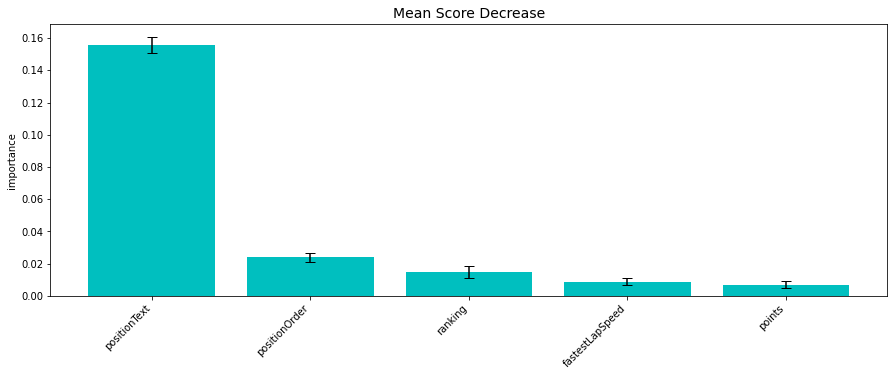

In [ ]:
# Visualiasi feature importance
df_imp = mean_score_decrease(X_train, y_train, model, plot=True, topk=5)

##### 4. Evaluasi Model

Dalam mengevaluasi performance algoritma dari Machine Learning (ML) (khususnya supervised learning), kita menggunakan acuan Confusion Matrix. Confusion Matrix merepresentasikan prediksi dan kondisi sebenarnya(aktual) dari data yang dihasilkan oleh algoritma ML. Berdasarkan Confusion Matrix, kita bisa menentukan Accuracy, Precission, Recall dan Specificity.

In [ ]:
# Import library
from jcopml.plot import plot_classification_report

Bisa dilihat secara seksama, dari hasil model prediksi yang kami buat menggunakan algoritma SVM, didapatkan nilai akurasi sebesar:

Model Training: 72%

Model Testing: 72% 

Dari hasil evaluasi model prediksi tersebut bisa dibilang cukup baik.

In [ ]:
# menampilkan hasil evaluasi
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                  precision    recall  f1-score   support

          +1 Lap       0.54      0.71      0.61      1393
         +2 Laps       0.45      0.21      0.29       328
         +3 Laps       0.00      0.00      0.00        93
         +4 Laps       0.00      0.00      0.00        42
         +5 Laps       0.00      0.00      0.00        10
         +6 Laps       0.00      0.00      0.00         2
         +7 Laps       0.00      0.00      0.00         1
         +8 Laps       0.00      0.00      0.00         2
        Accident       0.00      0.00      0.00        15
         Battery       0.00      0.00      0.00         1
          Brakes       0.00      0.00      0.00         7
       Collision       0.00      0.00      0.00        18
Collision damage       0.00      0.00      0.00         3
    Differential       0.00      0.00      0.00         1
             ERS       0.00      0.00      0.00         1
      Electrical       0.00      0.00      0.00         1
          Eng

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### 5. Prediksi Data dari hasil model SVM

kami mencoba memprediksi data dengan model yang sudah kami buat.

In [ ]:
# masukan fitur yang sesuai dengan kolom X_train
X_pred = pd.DataFrame([[2,2,2.0,2,18.0,40,2,205.648]], columns=X_train.columns)
X_pred

,start_position,final_position,positionText,positionOrder,points,fastestLap,ranking,fastestLapSpeed
0,2,2,2.0,2,18.0,40,2,205.648


In [ ]:
# Prediksi model
model.predict(X_pred)

array(['Finished'], dtype=object)

### Kesimpulan

Setelah melalui beberapa proses tahapan dari mulai cleaning data sampai refresentasi data bisa diambil kesimpulan:

- Dataset yang digunakan dalam analisis ini adalah dataset Driver F1 dari tahun 1985 - 2000
- Dari dataset tersebut dilakukan proses cleaning data, proses cleaning data dalam analisis ini terdiri dari 7 tahanapan yaitu:
  1. Menggabungkan kolom yang tidak penting
  2. Ekstrak dataset pada kolom date
  3. Rename kolom
  4. Replace \N dengan nilai 0
  5. Isi nilai yang kosong
  6. Drop kolom
  7. Rename tipe data yang sesuai
- Setelah melalui proses cleaning data maka dilakukan refresentasi data. refresentasi data ini terdiri dari 2 tahapan:

  1. Visualisasi Data

   a. Visualiasi Pemenang GP F1 berdasarkan position order dari tahun 1985 -  2000. 

   dari hasil visualisasi tersebut memperlihatkan bahwa driver "Lewis Hamilton" menduduki posisi 1 untuk kejuaraan F1 dari tahun 1985 - 2000 berdasarkan position order.

   b. Visualisasi Pemenang F1 berdasarkan jumlah point terbanyak dari tahun 1985 - 2000. 
   
   dari hasil visualisasi tersebut memperlihatkan bahwa driver "Lewis Hamilton" yang mendapatkan poin terbanyak dengan skor 42105 point untuk kejuaraan F1 dari tahun 1985 - 2000.

  2. Model Prediksi Machine Learning

   Dalam pemodelan  prediksi Machine Learning dilakukan beberapa tahapan:

   a. Split Data/Split Validation.

   Split validation berfungsi untuk memisahkan data training dan data testing. pada analisa ini kami membagi data testing sebesar 20% dan data training 80%.

   b. Training Model.
   
   setelah data di split, babak selanjutnya adalah training model. dalam training model ini kami menggunakan library pipeline dengan algoritma SVM dengan optimasi RandmizedSearchCV. Pada data numerik kami menggunakan metode standarized. 

   c. Feature Importance.

   feature importance bertujuan untuk melihat fitur yang paling berpengaruh terhadap proses training model. pada feature importance ini kami menggunakan perhitungan Mean Score Decrease atau score error yang di rata-ratakan. sehingga mendapatkan hasil bahwa fitur/variabel "position teks" menempati urutan pertama dalam mempengarui proses training model.

   d. Evaluasi 

   dalam proses Evaluasi kami menggunakan plot classification report. dari plot itu memperlihatkan nilai presisi, recall, f1, accuracy dll. kita berfokus pada nilai accuracy. nilai accuracy untuk model training dan model testing mendapatkan skor 0.72 (72%) hasil tersebut lumayan bagus untuk model prediksi ini.

   e. Sample Prediksi

   Pada tahap ini kami ingin mencoba memprediksi berdasarkan model yang sudah kami buat. nilai variabel sudah kami input, berdasarkan model prediksi yang kami buat nilai variabel yang sudah di input tadi menghasilkan prediksi dengan status "Finished". 




   ### Sekian dan Terima Kasih ###